
# Competition Summer 2022/2023

For the competition, you will work to detect anomalies in a recommender system based on ratings data from a streaming video dataset. Your task is to identify instances where users may be sharing accounts or engaging in other behavior that deviates from typical usage patterns.

Examples of anomalous behavior you may encounter include:

* **Account sharing:** This occurs when multiple users access a single account to watch videos, which can lead to skewed ratings and viewing histories.
* **Promoting items:** Some users may artificially promote or demote certain videos by rating them higher or lower than they would normally, either to manipulate the system or for personal reasons.
* **Review bombing:** A group of users may band together to artificially lower the rating of a particular video or video series, leading to a distorted view of its popularity.
* **Rating consistency:** Some users may rate all videos in a similar manner, regardless of their actual preferences or viewing habits. This may be an indication of fake accounts or bots.
* **Abnormal viewing patterns:** Users may exhibit unusual viewing patterns, such as watching an abnormally high number of videos in a short period of time, or repeatedly watching the same video multiple times. This may indicate account sharing or fraudulent activity.

Detecting anomalies in recommender systems is essential for maintaining the integrity and accuracy of the recommendations provided to users. Inaccurate or distorted data can result in suboptimal recommendations that do not align with a user's preferences or viewing history. This can lead to a poor user experience, reduced engagement, and ultimately, loss of users. For example, account sharing is a common anomaly that can skew the ratings and viewing history of a user, making it difficult to provide accurate recommendations. When multiple users access the same account to watch videos, their individual preferences and viewing habits are combined, leading to inaccurate representations of what each user actually likes. As a result, the recommendations provided may not accurately reflect the preferences of each user, leading to a suboptimal user experience.

Similarly, malicious users may artificially promote or demote videos to manipulate the system or for personal reasons. This could lead to videos being recommended more frequently than they deserve, or being recommended less frequently than they should be. Such anomalies can lead to inaccurate recommendations, which can negatively impact user engagement and satisfaction. Detecting and addressing these anomalies can help ensure that the recommendations provided to users are trustworthy and relevant. This can lead to increased user engagement and satisfaction, which can ultimately result in a more successful recommender system. Additionally, detecting anomalies can also help identify fraudulent or malicious activity, which can help protect the system and its users from potential harm.


# Steps of the competition

The competition consists of two steps. 

* In the first step, we will provide labels for all instances in the dataset, indicating which are anomalies and which are not. This step is important because it allows participants to train their models on a fully labeled dataset and establish a baseline for performance.

* In the second step, we will provide a partially labeled dataset, meaning that some instances will be labeled as anomalies, but others will be left unlabeled. This simulates a semi-supervised setting, where participants are required to identify anomalies without full knowledge of the labels.

It is important to note that the dataset may contain different types of anomalies, meaning that participants may observe anomalies in the second dataset that were not observed in the first. This requires participants to be flexible in their approach and able to adapt their models to new types of anomalies.

To submit their results, participants will be provided with two separate sets of data, one for each step of the competition. The leaderboard will consider the F1 score of participants' models on a subset of the instances in the dataset. The final evaluation, however, will consider all instances in the dataset. This ensures that participants are not simply overfitting to a specific subset of the data, but rather are building models that can generalize to new instances.

**Tips for feature engineering:** One common approach to feature engineering in this scenario is to use matrix factorization techniques to identify latent factors that explain user-item interactions. Matrix factorization is a technique used in recommender systems that involves decomposing the rating matrix into two lower-dimensional matrices. By doing so, the latent factors that explain user-item interactions can be identified, which can be used to make more accurate recommendations.

Another approach is to use graph-based techniques to analyze the network of user-item interactions. This involves creating a graph where users and items are nodes and interactions between them are edges. By analyzing the network structure, it may be possible to identify clusters of users or items that are more closely related, which can be used to make more targeted recommendations.

Finally, unsupervised learning techniques such as clustering and anomaly detection can also be used to identify anomalous behavior in the absence of additional data. These techniques analyze the patterns in the user-item interactions and identify instances that do not fit the normal patterns. 



In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import ClassifierMixin
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.cluster import KMeans

from catboost import CatBoostClassifier
# from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from yellowbrick.cluster import KElbowVisualizer

from ipywidgets import IntProgress
from IPython.display import display
from tqdm import tqdm


### load data

In [37]:
sum(ratings_supervised_label_np)

array([2.375025e+08, 2.740000e+02])

In [36]:
ratings_supervised_label_np[:10
]

array([[4.5001e+04, 0.0000e+00],
       [4.5002e+04, 0.0000e+00],
       [4.5003e+04, 0.0000e+00],
       [4.5004e+04, 0.0000e+00],
       [4.5005e+04, 1.0000e+00],
       [4.5006e+04, 0.0000e+00],
       [4.5007e+04, 0.0000e+00],
       [4.5008e+04, 0.0000e+00],
       [4.5009e+04, 0.0000e+00],
       [4.5010e+04, 1.0000e+00]])

In [2]:
ratings_supervised_np = np.load("secondBatch/ratings_supervised.npy").astype('int32')
ratings_supervised_label_np = np.load("secondBatch/ratings_supervised_label.npy")
ratings_competition_np = np.load("secondBatch/ratings_competition.npy").astype('int32')
ratings_leaderboard_np = np.load("secondBatch/ratings_leaderboard.npy").astype('int32')

ratings_merged_np = np.concatenate((ratings_supervised_np, ratings_leaderboard_np, ratings_competition_np), axis=0)

In [4]:
ratings_supervised_np

array([[45001,  4192,     3],
       [45001,  3305,     1],
       [45001,  2388,     3],
       ...,
       [50000,  4272,     4],
       [50000,  3127,     4],
       [50000,  2505,     5]], dtype=int32)

In [3]:
ratings_supervised = pd.DataFrame(ratings_supervised_np, columns=['user_id', 'item_id', 'rating'])
ratings_supervised_label = pd.DataFrame(ratings_supervised_label_np, columns=['user_id', 'y']) #, dtype=[np.int32, np])
ratings_supervised_label = ratings_supervised_label.set_index(['user_id'])
ratings_competition = pd.DataFrame(ratings_competition_np, columns=['user_id', 'item_id', 'rating'])
ratings_leaderboard = pd.DataFrame(ratings_leaderboard_np, columns=['user_id', 'item_id', 'rating'])

# ratings_merged = pd.DataFrame(ratings_merged_np, dtype=np.int32)
ratings_merged = pd.DataFrame(ratings_merged_np, columns=['user_id', 'item_id', 'rating'])


### display some info, ignore

In [7]:
display(f"{ratings_leaderboard_np.shape=}")
display(f"{ratings_supervised_label_np.shape=}")
display(f"{ratings_competition_np.shape=}")
display(f"{ratings_supervised_np.shape=}")

'ratings_leaderboard_np.shape=(4409116, 3)'

'ratings_supervised_label_np.shape=(5000, 2)'

'ratings_competition_np.shape=(4341052, 3)'

'ratings_supervised_np.shape=(506394, 3)'

In [5]:
# # afaik attekmpt to combine 1st and 2nd batch
#
# ratings_1stLEVEL_supervised_label_np=np.load("S23_FirstBatch_NIADM/train_1_labels.npy")
# ratings_1stLEVEL_supervised_np = np.load("S23_FirstBatch_NIADM/train_1.npy")
# ratings_1stLEVEL_UNsupervised_np=np.load("S23_FirstBatch_NIADM/test_1.npy")
# ratings_1stLEVEL_UNsupervised_TRAINED_label_np = np.load("S23_FirstBatch_NIADM/result0.8449.npy")
# ratings_1stLEVEL_UNsupervised_TRAINED_label_np = np.vstack((np.arange(40001,45001).T, ratings_1stLEVEL_UNsupervised_TRAINED_label_np)).T
#
# # CONCATING 1st round data to have bigger train dataset
# ratings_supervised_np = np.concatenate((ratings_1stLEVEL_supervised_np, ratings_supervised_np), axis=0)
# # ratings_supervised_np = np.concatenate((ratings_1stLEVEL_supervised_np, ratings_1stLEVEL_UNsupervised_np, ratings_supervised_np), axis=0)
# ratings_supervised_label_np = np.concatenate((ratings_1stLEVEL_supervised_label_np, ratings_supervised_label_np), axis=0)
# # ratings_supervised_label_np = np.concatenate((ratings_1stLEVEL_supervised_label_np, ratings_1stLEVEL_UNsupervised_TRAINED_label_np, ratings_supervised_label_np), axis=0)

In [8]:
print(f"ratings_supervised \n{ratings_supervised.nunique()}")
print(f"ratings_supervised_label \n{ratings_supervised_label.nunique()}")
print(f"ratings_competition \n{ratings_competition.nunique()}")
print(f"ratings_leaderboard \n{ratings_leaderboard.nunique()}")

ratings_supervised 
user_id    45000
item_id     4617
rating         6
dtype: int64
ratings_supervised_label 
y    2
dtype: int64
ratings_competition 
user_id    48944
item_id     2367
rating         5
dtype: int64
ratings_leaderboard 
user_id    50000
item_id     2367
rating         5
dtype: int64


In [23]:
print(f"ratings_supervised_lowest_user_id = {min(ratings_supervised_np[:, 0])}")
print(f"ratings_supervised_highest_user_id = {max(ratings_supervised_np[:, 0])}")
print(f"ratings_competition_lowest_user_id = {min(ratings_competition_np[:, 0])}")
print(f"ratings_competition_highest_user_id = {max(ratings_competition_np[:, 0])}")
print(f"ratings_leaderboard_lowest_user_id = {min(ratings_leaderboard_np[:, 0])}")
print(f"ratings_leaderboard_highest_user_id = {max(ratings_leaderboard_np[:, 0])}")

ratings_supervised_lowest_user_id = 45001
ratings_supervised_highest_user_id = 50000
ratings_competition_lowest_user_id = 100001
ratings_competition_highest_user_id = 148944
ratings_leaderboard_lowest_user_id = 50001
ratings_leaderboard_highest_user_id = 100000


In [10]:
print(f"ratings_supervised_lowest_item_id = {min(ratings_supervised_np[:, 1])}")
print(f"ratings_supervised_highest_item_id = {max(ratings_supervised_np[:, 1])}")
print(f"ratings_competition_lowest_item_id = {min(ratings_competition_np[:, 1])}")
print(f"ratings_competition_highest_item_id = {max(ratings_competition_np[:, 1])}")
print(f"ratings_leaderboard_lowest_item_id = {min(ratings_leaderboard_np[:, 1])}")
print(f"ratings_leaderboard_highest_item_id = {max(ratings_leaderboard_np[:, 1])}")

ratings_supervised_lowest_item_id = 0
ratings_supervised_highest_item_id = 4616
ratings_competition_lowest_item_id = 2250
ratings_competition_highest_item_id = 4616
ratings_leaderboard_lowest_item_id = 2250
ratings_leaderboard_highest_item_id = 4616


In [10]:
ratings_supervised.describe(include='all')

,user_id,item_id,rating
count,8.373851e+06,8.373851e+06,8.373851e+06
mean,2.410408e+04,1.271420e+03,3.712193e+00
std,1.396979e+04,8.543903e+02,1.066053e+00
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.201200e+04,5.860000e+02,3.000000e+00
50%,2.414900e+04,1.218000e+03,4.000000e+00
75%,3.599800e+04,1.808000e+03,4.000000e+00
max,5.000000e+04,4.616000e+03,5.000000e+00


### preprocess

In [4]:
def build_R_dense_np(data_np):
    item_count = np.unique(data_np[:,1]).shape[0]
    lower_item_id = min(data_np[:, 1])
    highest_item_id = max(data_np[:, 1])

    print(f"Lower user ID: {lower_item_id}")
    print(f"Highest user ID: {highest_item_id}")
    print(f"Number of users in test set: {item_count}")
    assert item_count == highest_item_id - lower_item_id + 1

    user_count = np.unique(data_np[:,0]).shape[0]
    lower_user_id = min(data_np[:, 0])
    highest_user_id = max(data_np[:, 0])

    print(f"Lower user ID: {lower_user_id}")
    print(f"Highest user ID: {highest_user_id}")
    print(f"Number of users in test set: {user_count}")
    assert user_count == highest_user_id - lower_user_id + 1
    # user_count = highest_user_id - lower_user_id + 1


    R_dense = np.repeat(np.nan,item_count*(user_count)).reshape(user_count, item_count)
    R_dense[data_np[:,0] - lower_user_id, data_np[:,1] - lower_item_id] = data_np[:,2]
    return R_dense
    # R_dense_test = pd.DataFrame(R_dense_test_np)

In [5]:
R_dense_ratings_supervised_np = build_R_dense_np(ratings_supervised_np)
R_dense_ratings_supervised_unproc = pd.DataFrame(R_dense_ratings_supervised_np)

R_dense_leaderboard_np = build_R_dense_np(ratings_leaderboard_np)
R_dense_leaderboard_unproc = pd.DataFrame(R_dense_leaderboard_np)

R_dense_competition_np = build_R_dense_np(ratings_competition_np)
R_dense_competition_unproc = pd.DataFrame(R_dense_competition_np)

R_dense_ratings_merged_np = build_R_dense_np(ratings_merged_np)
R_dense_ratings_merged = pd.DataFrame(R_dense_ratings_merged_np)

Lower user ID: 2250
Highest user ID: 4616
Number of users in test set: 2367
Lower user ID: 45001
Highest user ID: 50000
Number of users in test set: 5000
Lower user ID: 2250
Highest user ID: 4616
Number of users in test set: 2367
Lower user ID: 50001
Highest user ID: 100000
Number of users in test set: 50000
Lower user ID: 2250
Highest user ID: 4616
Number of users in test set: 2367
Lower user ID: 100001
Highest user ID: 148944
Number of users in test set: 48944
Lower user ID: 2250
Highest user ID: 4616
Number of users in test set: 2367
Lower user ID: 45001
Highest user ID: 148944
Number of users in test set: 103944


### ALS

In [6]:
def get_ALS(*args, **kwargs):
    U_ALS_matrix = np.load("/Users/jakubkucera/Documents/NI-ADM/NI-ADM_ALS/U_ALS_matrix.npy")
    VT_ALS_matrix = np.load("/Users/jakubkucera/Documents/NI-ADM/NI-ADM_ALS/VT_ALS_matrix.npy")
    return U_ALS_matrix, VT_ALS_matrix

U, V_T = get_ALS()

ratings_supervised_U = U[:5000]
ratings_leaderboard_U = U[5000:55000]
ratings_competition_U = U[55000:]

# R_pred = U @ V_T
print(f"U shape: {U.shape}")
print(f"V shape: {V_T.T.shape}")

U = None
V_T = None
# print(f"R_pred = U @ V_T shape: {R_pred.shape}")
# R_pred


U shape: (103944, 5)
V shape: (2367, 5)


### clusters

In [ ]:
paramgrid = {
        # 'mlp_layers': [(100),],
        # 'clusters': range(2, 20),
        'model': [RandomForestClassifier, KNeighborsClassifier, SVC, GaussianNB, LogisticRegression, XGBClassifier],
        # 'learning_rate_init': [0.0001, 0.0005, 0.001, 0.01]
    }
R_dense_ratings_merged_np_not_nan = np.nan_to_num(R_dense_ratings_merged_np, nan=-1)

kmeans_models = {}
mlp_trained_classifiers = {}
test_f1 = []
f1_2_params = []

# # for hidden_layer_sizes in hidden_layer_sizes_s:
for cluster_count in range(2, 40, 2):
    print(f"=== {cluster_count} ===")
    kmeans_model = KMeans(n_clusters=cluster_count).fit(R_dense_ratings_merged_np_not_nan)

    labels = kmeans_model.labels_
    distances = kmeans_model.transform(R_dense_ratings_merged_np_not_nan)
    # get distance to associated cluster center
    distances_to_center = distances.min(axis=1)

    ratings_supervised_cluster_labels = labels[:5000]
    ratings_leaderboard_cluster_labels = labels[5000:55000]
    ratings_competition_cluster_labels = labels[55000:]

    # ratings_supervised_cluster_distances = distances[:5000]
    # ratings_leaderboard_cluster_distances = distances[5000:10000]
    # ratings_competition_cluster_distances = distances[10000:]
    ratings_supervised_cluster_distances = distances_to_center[:5000].reshape(-1,1)
    ratings_leaderboard_cluster_distances = distances_to_center[5000:55000].reshape(-1,1)
    ratings_competition_cluster_distances = distances_to_center[55000:].reshape(-1,1)

    # TODO FOR cluster number, could use OHE
    # TODO add feature - cluster size. Could be just done by using different distance

    ratings_supervised_cluster_labels_distance = np.concatenate((ratings_supervised_cluster_labels.reshape(-1,1), ratings_supervised_cluster_distances), axis=1)
    ratings_leaderboard_cluster_labels_distance = np.concatenate((ratings_leaderboard_cluster_labels.reshape(-1,1), ratings_leaderboard_cluster_distances), axis=1)
    ratings_competition_cluster_labels_distance = np.concatenate((ratings_competition_cluster_labels.reshape(-1,1), ratings_competition_cluster_distances), axis=1)

    for params in ParameterGrid(paramgrid):
        params['clusters'] = cluster_count
        print(f"=== {params} ===")

        cls = params['model']()

        scores = cross_val_score(cls, ratings_supervised_cluster_labels_distance, ratings_supervised_label, cv=5, scoring='f1_macro')
        avg_score = scores.mean()
        print(f"f1s {scores}")
        print("avg", avg_score)


        test_f1.append(avg_score)
        f1_2_params.append((avg_score, {**params}))

In [ ]:

plt.figure(figsize=(20,6))
# plt.title(classifier.__name__)
plt.plot(test_f1,'or-')
# plt.plot(val_DELETE_f1,'ob-')
plt.xlabel('hyperparametr index')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
plt.show()

In [9]:
CLUSTER_COUNT = 15
# R_dense_ratings_merged_np = build_R_dense_np(ratings_merged_np)
R_dense_ratings_merged_np_not_nan = np.nan_to_num(R_dense_ratings_merged_np, nan=-1)

kmeans_model = KMeans(n_clusters=CLUSTER_COUNT).fit(R_dense_ratings_merged_np_not_nan)

labels = kmeans_model.labels_
distances = kmeans_model.transform(R_dense_ratings_merged_np_not_nan)
# get distance to associated cluster center
distances_to_center = distances.min(axis=1)

ratings_supervised_cluster_labels = labels[:5000]
ratings_leaderboard_cluster_labels = labels[5000:55000]
ratings_competition_cluster_labels = labels[55000:]

# ratings_supervised_cluster_distances = distances[:5000]
# ratings_leaderboard_cluster_distances = distances[5000:10000]
# ratings_competition_cluster_distances = distances[10000:]
ratings_supervised_cluster_distances = distances_to_center[:5000].reshape(-1,1)
ratings_leaderboard_cluster_distances = distances_to_center[5000:55000].reshape(-1,1)
ratings_competition_cluster_distances = distances_to_center[55000:].reshape(-1,1)

# TODO FOR cluster number, could use OHE
# TODO add feature - cluster size. Could be just done by using different distance

ratings_supervised_cluster_labels_distance = np.concatenate((ratings_supervised_cluster_labels.reshape(-1,1), ratings_supervised_cluster_distances), axis=1)
ratings_leaderboard_cluster_labels_distance = np.concatenate((ratings_leaderboard_cluster_labels.reshape(-1,1), ratings_leaderboard_cluster_distances), axis=1)
ratings_competition_cluster_labels_distance = np.concatenate((ratings_competition_cluster_labels.reshape(-1,1), ratings_competition_cluster_distances), axis=1)


/Users/jakubkucera/Documents/NI-ADM/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### mahanalobis

In [10]:
mahanalobis_distances = np.load("./mahanalobis_distances.npy")
ratings_supervised_mahanalobis = mahanalobis_distances[:5000]
ratings_leaderboard_mahanalobis = mahanalobis_distances[5000:55000]
ratings_competition_mahanalobis = mahanalobis_distances[55000:]

# mahanalobis_distances = None

In [ ]:
def calculateMahalanobis(data):
    print("start")
    y_mu = data - np.mean(data,axis=0)
    print(f"DONE y_mu = data - np.mean(data,axis=0)")
    cov = np.cov(data.values.T)
    print(f"DONE cov = np.cov(data.values.T)")
    inv_covmat = np.linalg.inv(cov)
    print(f"DONE inv_covmat = np.linalg.inv(cov)")
    left = np.dot(y_mu, inv_covmat)
    print(f"DONE left = np.dot(y_mu, inv_covmat)")
    mahal = np.dot(left, y_mu.T)
    print(f"DONE mahal = np.dot(left, y_mu.T)")
    mahal_diag = mahal.diagonal()
    print(f"DONE mahal_diag = mahal.diagonal()")
    return mahal_diag

mahanalobis_distances = calculateMahalanobis(pd.DataFrame(np.nan_to_num(R_dense_ratings_merged_np, nan=-1)))
mahanalobis_distances

start
DONE y_mu = data - np.mean(data,axis=0)
DONE cov = np.cov(data.values.T)
DONE inv_covmat = np.linalg.inv(cov)
DONE left = np.dot(y_mu, inv_covmat)


In [59]:
# def error_PCA(pca):
#     s_ = pca.singular_values_
#     # Calculate the error by using singular values (not normalized).
#     # If all features are present, than the error being made is 0.
#     # The calculation corresponds to ||A - B_k||, where B_k is
#     # low rank approximation of A. We can calculate norm of A by
#     # using singular values and thus speeding up the process.
#     # https://cw.fel.cvut.cz/b202/_media/courses/b0b33opt/09svd.pdf
#     errs_ = np.append(np.cumsum((s_**2)[::-1])[::-1], 0)
#     return errs_,s_
#
# # s stands for singular values
# def plot_PCA_errors(errors, s, title):
#     # plot errors with singular values (leave out zero because of log)
#     plt.plot(np.log10(errors[:-1]), label="error ||A-B_k||")
#     plt.plot(np.log10(s), label="singular values")
#
#     # rest
#     plt.title(title)
#     plt.ylabel("log10")
#     plt.xlabel("number of features")
#     plt.legend()
#     plt.show()

In [61]:
# pca = PCA(svd_solver='full')
# pca.fit(R_dense_ratings_merged_np)

PCA(svd_solver='full')

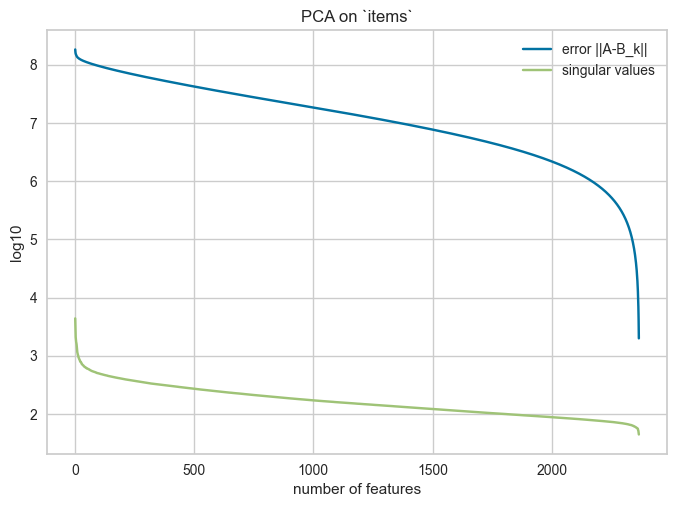

In [62]:
# errors, s_values = error_PCA(pca)
# plot_PCA_errors(errors, s_values, "PCA on `items`")

In [11]:
def preprocess_get_ratings_stats(R_dense: pd.DataFrame, orig_data: pd.DataFrame):
    ratings_count = R_dense.count(axis=1)
    min_rating = R_dense.min(axis=1)
    max_rating = R_dense.max(axis=1)
    mean_rating = R_dense.mean(axis=1)
    median_rating = R_dense.median(axis=1)
    var_rating = R_dense.var(axis=1)
    std_rating = R_dense.std(axis=1)
    # abs_rating = R_dense.abs(axis=1)  # TODO check
    # sum_rating = R_dense.sum(axis=1)  # TODO DELETE, needs scaling? (becomes mean,...)
    rating_0_sum = np.sum((R_dense == 0), axis=0)
    rating_1_sum = np.sum((R_dense == 1), axis=0)
    rating_2_sum = np.sum((R_dense == 2), axis=0)
    rating_3_sum = np.sum((R_dense == 3), axis=0)
    rating_4_sum = np.sum((R_dense == 4), axis=0)
    rating_5_sum = np.sum((R_dense == 5), axis=0)
    skeq_rating = R_dense.skew(axis=1)
    kurt_rating = R_dense.kurt(axis=1)
    # TODO check more methods


    # TODO add percentage of each rating.

    # check if there are multiple ratings per user per item. (on train_1)
    # currently always False
    # TODO try in 2nd round
    orig_data_counts = orig_data.user_id.value_counts(sort=False)
    # print(orig_data_counts)
    # print(ratings_count)
    no_multiple_ratings_per_user = ratings_count.reset_index(drop=True) == orig_data_counts.reset_index(drop=True)
    display(no_multiple_ratings_per_user.value_counts())


    out_df = pd.DataFrame()

    out_df[out_df.shape[1]+1] = ratings_count
    out_df[out_df.shape[1]+1] = min_rating
    out_df[out_df.shape[1]+1] = max_rating
    out_df[out_df.shape[1]+1] = mean_rating
    out_df[out_df.shape[1]+1] = median_rating
    out_df[out_df.shape[1]+1] = var_rating
    out_df[out_df.shape[1]+1] = std_rating
    # out_df[out_df.shape[1]+1] = abs_rating
    # out_df[out_df.shape[1]+1] = sum_rating
    out_df[out_df.shape[1]+1] = rating_0_sum
    out_df[out_df.shape[1]+1] = rating_1_sum
    out_df[out_df.shape[1]+1] = rating_2_sum
    out_df[out_df.shape[1]+1] = rating_3_sum
    out_df[out_df.shape[1]+1] = rating_4_sum
    out_df[out_df.shape[1]+1] = rating_5_sum
    out_df[out_df.shape[1]+1] = skeq_rating
    out_df[out_df.shape[1]+1] = kurt_rating
    # out_df[out_df.shape[1]+1] = no_multiple_ratings_per_user

    return out_df


In [12]:
def preproess_R_dense(R_dense: pd.DataFrame, orig_data: pd.DataFrame, keep_ratings: bool = True, clusters: np.ndarray = None, ALS_U: np.ndarray = None, mahalanobis: np.ndarray = None):

    rating_stats = preprocess_get_ratings_stats(R_dense, orig_data)
    assert rating_stats.shape[0] == R_dense.shape[0]


    # TODO delete to keep orig features
    if keep_ratings:
        R_dense_copy = R_dense.copy(deep=True)
    else:
        R_dense_copy = pd.DataFrame()

    R_dense_copy = pd.concat([R_dense_copy, rating_stats], axis=1)

    assert R_dense.shape[0] == R_dense_copy.shape[0]

    # clusters_df = pd.DataFrame(clusters, columns=['label', 'loc1', 'loc2'])
    if clusters is not None:
        clusters_df = pd.DataFrame(clusters) # TODO resolve
        R_dense_copy = pd.concat([R_dense_copy, clusters_df], axis=1)
        assert R_dense.shape[0] == R_dense_copy.shape[0]

    if ALS_U is not None:
        ALS_U_pd = pd.DataFrame(ALS_U)
        R_dense_copy = pd.concat([R_dense_copy, ALS_U_pd], axis=1)
        assert R_dense.shape[0] == R_dense_copy.shape[0]

    if mahalanobis is not None:
        mahalanobis_pd = pd.DataFrame(mahalanobis)
        R_dense_copy = pd.concat([R_dense_copy, mahalanobis_pd], axis=1)
        assert R_dense.shape[0] == R_dense_copy.shape[0]

    R_dense_copy = R_dense_copy.fillna(-1)
    # convert column names to int
    # R_dense_copy.columns = R_dense_copy.columns.astype(str)
    assert R_dense.shape[0] == R_dense_copy.shape[0]
    return R_dense_copy

In [15]:
ratings_supervised_cluster_labels_distance = None
ratings_leaderboard_cluster_labels_distance = None
ratings_competition_cluster_labels_distance = None

In [ ]:
ratings_supervised_U = None
ratings_leaderboard_U = None
ratings_competition_U = None

In [ ]:
ratings_supervised_mahanalobis = None
ratings_leaderboard_mahanalobis = None
ratings_competition_mahanalobis = None

In [13]:
keep_ratings = True

R_dense_ratings_supervised = preproess_R_dense(R_dense_ratings_supervised_unproc, ratings_supervised, clusters=ratings_supervised_cluster_labels_distance, ALS_U=ratings_supervised_U, mahalanobis=ratings_supervised_mahanalobis, keep_ratings=keep_ratings)
R_dense_leaderboard = preproess_R_dense(R_dense_leaderboard_unproc, ratings_leaderboard, clusters=ratings_leaderboard_cluster_labels_distance, ALS_U=ratings_leaderboard_U, mahalanobis=ratings_leaderboard_mahanalobis, keep_ratings=keep_ratings)
R_dense_competition = preproess_R_dense(R_dense_competition_unproc, ratings_competition, clusters=ratings_competition_cluster_labels_distance, ALS_U=ratings_competition_U, mahalanobis=ratings_competition_mahanalobis, keep_ratings=keep_ratings)

True     4999
False       1
dtype: int64

True    50000
dtype: int64

True    48944
dtype: int64

In [90]:
corrP = R_dense_ratings_supervised.join(ratings_supervised_label.reset_index().drop(columns=['user_id']))

In [93]:
corrP_cols

Int64Index([4, 9, 26, 29, 37, 64, 72, 94, 97, 115], dtype='int64')

In [92]:
corrP_cols = R_dense_ratings_supervised.join(ratings_supervised_label.reset_index().drop(columns=['user_id'])).y.abs().nlargest(10).index # get the index and then plot the real values
display(corrP.y.loc[corrP_cols])

# calculate p-values of the corresponding F-test (if the correlation = 0)
Fscores, pvals = feature_selection.f_regression(X,y)
pvals_result = pd.Series(pvals, index = X.columns)
print("5 largest P-values:")
display(pvals_result.nlargest(5))
print("5 smallest (absolute value) correlations:")
display(corrP.SalePrice.drop(columns_to_remove, errors = 'ignore').abs().nsmallest(5))

4      1.0
9      1.0
26     1.0
29     1.0
37     1.0
64     1.0
72     1.0
94     1.0
97     1.0
115    1.0
Name: y, dtype: float64

NameError: name 'feature_selection' is not defined

In [142]:
sc = StandardScaler()
scaler = sc.fit(R_dense_ratings_supervised)
R_dense_ratings_supervised = scaler.transform(R_dense_ratings_supervised)
R_dense_leaderboard = scaler.transform(R_dense_leaderboard)
R_dense_competition = scaler.transform(R_dense_competition)

In [14]:
R_dense_ratings_supervised_convNP = R_dense_ratings_supervised.to_numpy()
# R_dense_ratings_supervised_convNP = R_dense_ratings_supervised


X_all = R_dense_ratings_supervised_convNP
y_all = ratings_supervised_label

# R_dense_ratings_supervised_convNP = R_dense_ratings_supervised.to_numpy()
# X_train, X_test, y_train, y_test = train_test_split(R_dense_ratings_supervised_convNP, ratings_supervised_label, test_size=0.001, random_state=42)
#
#
# assert y_train.shape[0] == X_train.shape[0]
# assert y_test.shape[0] == X_test.shape[0]

#


In [24]:
X_all.shape

(103944, 2380)

In [15]:
X_all

array([[-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
         7.64019759e-01,  6.77700683e-01,  2.40101514e+03],
       [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
         2.90200219e-01,  2.61766369e-01,  2.95601343e+03],
       [-1.00000000e+00,  1.00000000e+00, -1.00000000e+00, ...,
        -1.25477125e-01,  8.81804536e-02,  3.91353491e+03],
       ...,
       [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
         4.86840131e-01,  2.21703046e-01,  1.48167444e+03],
       [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
         1.98748246e-01,  3.68106862e-01,  9.27642273e+02],
       [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
         2.95503353e-01,  2.39029129e-01,  3.66006934e+03]])

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
        'hidden_layer_sizes': [(25, ), (50, ), (100, ), (200,), (25, 25), (50, 50), (100, 100), (200, 200), (200, 100, 200), (150,100,50), (120,80,40), (100,50,30), (1024, 512, 256, 128, 64, 32, 16, 8, 4)],
    # 'max_iter': [50, 100, 150],
    # 'activation': ['tanh', 'relu'],
    # 'solver': ['sgd', 'adam'],
        'alpha': [0.0001, 0.05],
    # 'learning_rate': ['constant','adaptive'],
        'learning_rate_init': [0.0001, 0.001, 0.01]
    }
mlp_cls = MLPClassifier(random_state=42)
clf = GridSearchCV(mlp_cls, parameters, cv=5, scoring='f1_macro', verbose=10, n_jobs=-1)
clf.fit(X_all, y_all)
clf.best_estimator_

Fitting 5 folds for each of 78 candidates, totalling 390 fits


/Users/jakubkucera/Documents/NI-ADM/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1099: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jakubkucera/Documents/NI-ADM/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1099: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jakubkucera/Documents/NI-ADM/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1099: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jakubkucera/Documents/NI-ADM/.venv/lib/python3.1

In [27]:
clf.cv_results_

{'mean_fit_time': array([ 16.83892689,  16.23074117,   8.06296577,  27.54445434,
         22.48970313,  11.94750252,  47.9018826 ,  32.90658922,
         20.07375922,  97.30565829,  50.30152707,  45.91416855,
         18.23751364,  12.89045534,   6.68015013,  26.36605816,
         13.62048998,   7.69980965,  45.44171972,  24.59939098,
         18.01144128, 103.99891896,  35.02510934,  29.31138444,
         79.96896772,  44.48615446,  35.65550523,  73.67009683,
         30.1761694 ,  24.81309838,  50.87365432,  24.84316773,
         19.82358465,  48.02852688,  19.41422496,  22.9686904 ,
        294.39034476, 432.60770202, 272.23794637,  19.10884881,
         15.87610016,   4.07895942,  29.30881062,  21.84308548,
          6.15121088,  45.58153901,  11.00709801,  11.77393923,
         94.72875099,  41.07205601,  33.33827238,  20.22527771,
         14.32644286,   5.60557685,  30.07730422,  14.07607579,
          9.73937798,  48.97158418,  23.10154099,  13.97003903,
        107.78308539,  

In [ ]:
classifiers = {
    # "SVC(kernel=\"linear\", C=0.025)": SVC(kernel="linear", C=0.025),  # TODO TRY, TAKES too long
    # "SVC(gamma=2, C=1)": SVC(gamma=2, C=1),  # TODO TRY, TAKES too long
    # "SVC": SVC(),  # TODO TRY, TAKES too long
    "LogisticRegression": LogisticRegression(max_iter=500),  # currently not good results
    # "LogisticRegressionCV": LogisticRegressionCV(),  # currently not good results
    "SGDClassifier": SGDClassifier(),  # currently not good results
    # "GradientBoostingClassifier": GradientBoostingClassifier(),  # currently not good results
    # "MLPClassifier": MLPClassifier((100, 100,)),  # TODO uncomment
    "MLPClassifier": MLPClassifier(max_iter=500 ),  # TODO uncomment
    "BaggingClassifier": BaggingClassifier(),  # ok, results
    # "RidgeClassifierCV": RidgeClassifierCV(),  # currently not good results
    "RidgeClassifier": RidgeClassifier(),  # currently not good results
    "k-Nearest Neighbors": KNeighborsClassifier(2),  # TMP comment
    "Decision Tree": DecisionTreeClassifier(), # not bas results
    "AdaBoostClassifier(),": AdaBoostClassifier(),
    # "AdaBoostClassifier_DecTree": AdaBoostClassifier(DecisionTreeClassifier(),learning_rate=1),  # TMP comment
    # "RandomForestClassifier": RandomForestClassifier(max_depth = m_depth),
    "RandomForestClassifier": RandomForestClassifier(), # not bas results
    # "AdaBoostClassifierRndForrest": AdaBoostClassifier(RandomForestClassifier(),learning_rate=1),  # TMP comment
    # "CatBoostClassifier": CatBoostClassifier(max_depth = m_depth, silent = True),
    "CatBoostClassifier": CatBoostClassifier(silent = True),  # TODO try
    # "LGBMClassifier": LGBMClassifier(max_depth = m_depth),
    # "LGBMClassifier": LGBMClassifier(),  # TODO try
    # "XGBClassifier": XGBClassifier(max_depth = m_depth, use_label_encoder=False),
    "XGBClassifier": XGBClassifier(use_label_encoder=False), # not bas results  # feature names must be unique, # TODO fix
}
trained_classifiers = {}

for cls_name, cls in classifiers.items():
    print(f"=== {cls_name} ===")
    scores = cross_val_score(cls, X_all, y_all.to_numpy(), cv=10, scoring='f1_macro')
    print(f"f1s {scores}")
    print("avg", scores.mean())
    # fitted_cls = cls.fit(X_train, y_train)
    # trained_classifiers[cls_name] = fitted_cls
    # y_pred = fitted_cls.predict(X_test)
    # cnf_matrix = confusion_matrix(y_test, y_pred)
    # # plot_confusion_matrix(cnf_matrix, classes=[0,1], title='Confusion matrix, original data')
    # print('\nOriginal data \nAccuracy: ', accuracy_score(y_test, y_pred), '\nF1-score: ', f1_score(y_test, y_pred))

/Users/jakubkucera/Documents/NI-ADM/.venv/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/jakubkucera/Documents/NI-ADM/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== LogisticRegression ===


/Users/jakubkucera/Documents/NI-ADM/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jakubkucera/Documents/NI-ADM/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jakubkucera/Documents/NI-ADM/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1

f1s [0.55789474 0.53496006 0.57749279 0.61261508 0.52948956 0.53895805
 0.56704038 0.54830734 0.47970864 0.52453404]
avg 0.5471000672263717
=== SGDClassifier ===


/Users/jakubkucera/Documents/NI-ADM/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jakubkucera/Documents/NI-ADM/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jakubkucera/Documents/NI-ADM/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jakubkucera/Documents/NI-ADM/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversio

f1s [0.43047824 0.48612539 0.48612539 0.08347208 0.48453608 0.5223398
 0.48559671 0.48559671 0.47916667 0.48559671]
avg 0.44290337612967556
=== MLPClassifier ===


/Users/jakubkucera/Documents/NI-ADM/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1099: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
RESULT_FILE = "result"

def predict(X: pd.DataFrame, classifier: ClassifierMixin):
    y_pred = classifier.predict(X)
    return y_pred

def write_predictions(y_local: np.ndarray, filename: str = RESULT_FILE):
    np.savetxt(f"{filename}.txt", y_local, fmt='%d', delimiter='', newline='')
    # np.save(f"{filename}.npy", y_local)
    with open(f"{filename}.npy", 'wb') as f:
        np.save(f, y_local, allow_pickle=False)

### Predict on test set

In [162]:
X_all

,y
user_id,
45001.0,0.0
45002.0,0.0
45003.0,0.0
45004.0,0.0
45005.0,1.0
...,...
49996.0,0.0
49997.0,0.0
49998.0,0.0


In [167]:
# for cls_name, cls in trained_classifiers.items():
for cls_name, cls in classifiers.items():
    print(f"=== {cls_name} ===")
    trained_best_classifier = cls.fit(X_all.to_numpy(), y_all.to_numpy())
    y_leaderboard_predicted = predict(R_dense_leaderboard.to_numpy(), cls)
    y_competition_predicted = predict(R_dense_competition.to_numpy(), cls)
    print(f"Leaderboard predicted True {sum(y_leaderboard_predicted)}")
    print(f"Competition predicted True {sum(y_competition_predicted)}")
    y_leaderboard_predicted = predict(R_dense_leaderboard.to_numpy(), trained_best_classifier)
    y_competition_predicted = predict(R_dense_competition.to_numpy(), trained_best_classifier)
    print(f"Leaderboard predicted True {sum(y_leaderboard_predicted)}")
    print(f"Competition predicted True {sum(y_competition_predicted)}")

=== LogisticRegression ===


/Users/jakubkucera/Documents/NI-ADM/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jakubkucera/Documents/NI-ADM/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Leaderboard predicted True 1245.0
Competition predicted True 1266.0
Leaderboard predicted True 1245.0
Competition predicted True 1266.0
=== SGDClassifier ===


/Users/jakubkucera/Documents/NI-ADM/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Leaderboard predicted True 4.0
Competition predicted True 2.0
Leaderboard predicted True 4.0
Competition predicted True 2.0
=== MLPClassifier ===


/Users/jakubkucera/Documents/NI-ADM/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1099: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Leaderboard predicted True 1776.0
Competition predicted True 1756.0
Leaderboard predicted True 1776.0
Competition predicted True 1756.0
=== BaggingClassifier ===


/Users/jakubkucera/Documents/NI-ADM/.venv/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Leaderboard predicted True 200.0
Competition predicted True 192.0
Leaderboard predicted True 200.0
Competition predicted True 192.0
=== RidgeClassifier ===


/Users/jakubkucera/Documents/NI-ADM/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Leaderboard predicted True 3071.0
Competition predicted True 3107.0
Leaderboard predicted True 3071.0
Competition predicted True 3107.0
=== k-Nearest Neighbors ===


/Users/jakubkucera/Documents/NI-ADM/.venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Leaderboard predicted True 248.0
Competition predicted True 231.0
Leaderboard predicted True 248.0
Competition predicted True 231.0
=== Decision Tree ===
Leaderboard predicted True 2876.0
Competition predicted True 2883.0
Leaderboard predicted True 2876.0
Competition predicted True 2883.0
=== AdaBoostClassifier(), ===


/Users/jakubkucera/Documents/NI-ADM/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Leaderboard predicted True 671.0
Competition predicted True 642.0
Leaderboard predicted True 671.0
Competition predicted True 642.0
=== RandomForestClassifier ===


/var/folders/gm/6zjcwbd164d1v4gmx73009pr0000gn/T/ipykernel_23145/1177780767.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  trained_best_classifier = cls.fit(X_all, y_all)


Leaderboard predicted True 0.0
Competition predicted True 0.0
Leaderboard predicted True 0.0
Competition predicted True 0.0
=== CatBoostClassifier ===
Leaderboard predicted True 91.0
Competition predicted True 99.0
Leaderboard predicted True 91.0
Competition predicted True 99.0
=== XGBClassifier ===
Leaderboard predicted True 439
Competition predicted True 418
Leaderboard predicted True 439
Competition predicted True 418


In [30]:
traine_best_classifier = MLPClassifier(**clf.best_params_)

trained_best_classifier = traine_best_classifier.fit(X_all, y_all.to_numpy())


/Users/jakubkucera/Documents/NI-ADM/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1099: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:

y_leaderboard_predicted = predict(R_dense_leaderboard.to_numpy(), trained_best_classifier)
y_competition_predicted = predict(R_dense_competition.to_numpy(), trained_best_classifier)

print(f"Leaderboard predicted True {sum(y_leaderboard_predicted)}")
print(f"Competition predicted True {sum(y_competition_predicted)}")

Leaderboard predicted True 1743.0
Competition predicted True 1785.0


In [32]:
custom_suffix = ""
write_predictions(y_leaderboard_predicted, filename=f"result_leaderboard_{custom_suffix}")
write_predictions(y_competition_predicted, filename=f"result_competition_{custom_suffix}")

## Rnd notes

Clusters + only distance in given cluster
    add Mahalanois distance as well - copy code from LAB?
    or at least "relatice distance"
~~create clusters on NOT-ANOMALOUS users!~~

Check ALS loss
Add ALS as additional features
restructure code, to have funcs returning new features, so that it is easier to conbine later (ratings, clusters, ALS, PCA, ...)
imporve train loop with cross eval
run on models
add params to more models - random forrests, catboosts, smth simpler as well

TODO
PCA before classification
NORMALIZE vals
check how unbalanced are train and test data

feature extraction:
create some features - > correlation matrix (rating == 0 => bad guy)
corellation (matrix) for all? filter by some min value. Some items only rated by bad users
1 user, 1 item, multiple ratings bad?
create feature, number of ratings per user, per item
number of ratingx per user from DF matrix.  and number of ratings per user from original data. If not match, => mutliple ratings by 1 user per 1 item?

cluster users, color by `y`
cluster items -> merge as feature, (delete orig items)
from trained Trees (/NN?) find out which features are important. Use shallow trees, or Random Forest?

FOR BEtter models use the ParameterGrid to find best params
  make visualisation of loss over parameter changes. (also plot test data error)
ensamble model, train weights


VAE to latent space to see smth?


use ALS to reduce feature count

Add ALS as another features and just train NN

cluster by different number of clusters
1) just add all multiplefeatures with cluster numbers
2) pick cluster count, train, measure error, pick best

^ try different metrics for distance. Trye the one from 2nd LAB
just do paramgrid